# Tasks

# imports


In [59]:
# Machine Learning Library that contains example datasets.
import sklearn as skl

# Data frames
import pandas as pd

#Plots the various histograms
import matplotlib.pyplot as plt

# Numerical arrays, in case we need to mess with the array, 
# though our array is only 2 dimensional and we're not applying any addition/mulitplication etc
import numpy as np

## Task 1: Source the Data Set

We want to import the Iris data set from the sklearn.datasets module.
Then explain what the load_iris() function returns.

In [60]:
#Load the iris dataset
df = pd.read_csv ("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")


The load_iris() has imports the data from an external source, in this case a csv file in the hyperlink.

## Task 2: Explore the Data Structure

Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [61]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


 By calling the variable name that we assiged to the data we loaded,  it displays the data in a table. As someone has written in the names of the four different characteristics (sepal length, sepal width, petal length, and petal width) and the three unique species, at the start of the csv file, Pandas has worked out these are the headers to the various variables oservations. Pandas tells us that yes there are 5 variables, and there are 150 observations, so we can say that the shape of the dataset is 150 x 5.
There are 50 observations for each of the three species, and we can see the sepal length, sepal width, petal length, and petal width for each of the 50 observations for each species.

In [62]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Again, just confirming that there are 5 different variables.

In [63]:
df["sepal_length"].shape

(150,)

In [64]:
df["species"].shape

(150,)

Again, showing there are 150 rows or observations.

## Task 3: Summarize the Data

For each feature in the dataset, calculate and display:

    mean
    minimum
    maximum
    standard deviation
    median


In [66]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Here we can see the number of iris, the mean or average of each of the four variables (sepal length, sepal width, petal length, and petal width), the standard deviation around the mean value, the minimum and maximum values, and finally the different quartiles, where the 50% quartile is our median value.

## Task 4: Visualize Features

Plot histograms for each feature using matplotlib.
Add appropriate titles and axis labels.


In [ ]:
 ## This is our source data put into a multidimensional array

setosa = ([5.1,3.5,1.4,0.2],[4.9,3.0,1.4,0.2],[4.7,3.2,1.3,0.2],[4.6,3.1,1.5,0.2],[5.0,3.6,1.4,0.2],[5.4,3.9,1.7,0.4],[4.6,3.4,1.4,0.3],[5.0,3.4,1.5,0.2],[4.4,2.9,1.4,0.2],[4.9,3.1,1.5,0.1],[5.4,3.7,1.5,0.2],[4.8,3.4,1.6,0.2],[4.8,3.0,1.4,0.1],[4.3,3.0,1.1,0.1],[5.8,4.0,1.2,0.2],[5.7,4.4,1.5,0.4],[5.4,3.9,1.3,0.4],[5.1,3.5,1.4,0.3],[5.7,3.8,1.7,0.3],[5.1,3.8,1.5,0.3],[5.4,3.4,1.7,0.2],[5.1,3.7,1.5,0.4],[4.6,3.6,1.0,0.2],[5.1,3.3,1.7,0.5],[4.8,3.4,1.9,0.2],[5.0,3.0,1.6,0.2],[5.0,3.4,1.6,0.4],[5.2,3.5,1.5,0.2],[5.2,3.4,1.4,0.2],[4.7,3.2,1.6,0.2],[4.8,3.1,1.6,0.2],[5.4,3.4,1.5,0.4],[5.2,4.1,1.5,0.1],[5.5,4.2,1.4,0.2],[4.9,3.1,1.5,0.1],[5.0,3.2,1.2,0.2],[5.5,3.5,1.3,0.2],[4.9,3.1,1.5,0.1],[4.4,3.0,1.3,0.2],[5.1,3.4,1.5,0.2],[5.0,3.5,1.3,0.3],[4.5,2.3,1.3,0.3],[4.4,3.2,1.3,0.2],[5.0,3.5,1.6,0.6],[5.1,3.8,1.9,0.4],[4.8,3.0,1.4,0.3],[5.1,3.8,1.6,0.2],[4.6,3.2,1.4,0.2],[5.3,3.7,1.5,0.2],[5.0,3.3,1.4,0.2])
versicolor= ([7.0,3.2,4.7,1.4],[6.4,3.2,4.5,1.5],[6.9,3.1,4.9,1.5],[5.5,2.3,4.0,1.3],[6.5,2.8,4.6,1.5],[5.7,2.8,4.5,1.3],[6.3,3.3,4.7,1.6],[4.9,2.4,3.3,1.0],[6.6,2.9,4.6,1.3],[5.2,2.7,3.9,1.4],[5.0,2.0,3.5,1.0],[5.9,3.0,4.2,1.5],[6.0,2.2,4.0,1.0],[6.1,2.9,4.7,1.4],[5.6,2.9,3.6,1.3],[6.7,3.1,4.4,1.4],[5.6,3.0,4.5,1.5],[5.8,2.7,4.1,1.0],[6.2,2.2,4.5,1.5],[5.6,2.5,3.9,1.1],[5.9,3.2,4.8,1.8],[6.1,2.8,4.0,1.3],[6.3,2.5,4.9,1.5],[6.1,2.8,4.7,1.2],[6.4,2.9,4.3,1.3],[6.6,3.0,4.4,1.4],[6.8,2.8,4.8,1.4],[6.7,3.0,5.0,1.7],[6.0,2.9,4.5,1.5],[5.7,2.6,3.5,1.0],[5.5,2.4,3.8,1.1],[5.5,2.4,3.7,1.0],[5.8,2.7,3.9,1.2],[6.0,2.7,5.1,1.6],[5.4,3.0,4.5,1.5],[6.0,3.4,4.5,1.6],[6.7,3.1,4.7,1.5],[6.3,2.3,4.4,1.3],[5.6,3.0,4.1,1.3],[5.5,2.5,4.0,1.3],[5.5,2.6,4.4,1.2],[6.1,3.0,4.6,1.4],[5.8,2.6,4.0,1.2],[5.0,2.3,3.3,1.0],[5.6,2.7,4.2,1.3],[.7,3.0,4.2,1.2],[5.7,2.9,4.2,1.3],[6.2,2.9,4.3,1.3],[5.1,2.5,3.0,1.1],[5.7,2.8,4.1,1.3])
virginica= ([6.3,3.3,6.0,2.5],[5.8,2.7,5.1,1.9],[7.1,3.0,5.9,2.1],[6.3,2.9,5.6,1.8],[6.5,3.0,5.8,2.2],[7.6,3.0,6.6,2.1],[4.9,2.5,4.5,1.7],[7.3,2.9,6.3,1.8],[6.7,2.5,5.8,1.8],[7.2,3.6,6.1,2.5],[6.5,3.2,5.1,2.0],[6.4,2.7,5.3,1.9],[6.8,3.0,5.5,2.1],[5.7,2.5,5.0,2.0],[5.8,2.8,5.1,2.4],[6.4,3.2,5.3,2.3],[6.5,3.0,5.5,1.8],[7.7,3.8,6.7,2.2],[7.7,2.6,6.9,2.3],[6.0,2.2,5.0,1.5],[6.9,3.2,5.7,2.3],[5.6,2.8,4.9,2.0],[7.7,2.8,6.7,2.0],[6.3,2.7,4.9,1.8],[6.7,3.3,5.7,2.1],[7.2,3.2,6.0,1.8],[6.2,2.8,4.8,1.8],[6.1,3.0,4.9,1.8],[6.4,2.8,5.6,2.1],[7.2,3.0,5.8,1.6],[7.4,2.8,6.1,1.9],[7.9,3.8,6.4,2.0],[6.4,2.8,5.6,2.2],[6.3,2.8,5.1,1.5],[6.1,2.6,5.6,1.4],[7.7,3.0,6.1,2.3],[6.3,3.4,5.6,2.4],[6.4,3.1,5.5,1.8],[6.0,3.0,4.8,1.8],[6.9,3.1,5.4,2.1],[6.7,3.1,5.6,2.4],[6.9,3.1,5.1,2.3],[5.8,2.7,5.1,1.9],[6.8,3.2,5.9,2.3],[6.7,3.3,5.7,2.5],[6.7,3.0,5.2,2.3],[6.3,2.5,5.0,1.9],[6.5,3.0,5.2,2.0],[6.2,3.4,5.4,2.3],[5.9,3.0,5.1,1.8])

iris=(setosa,versicolor,virginica)


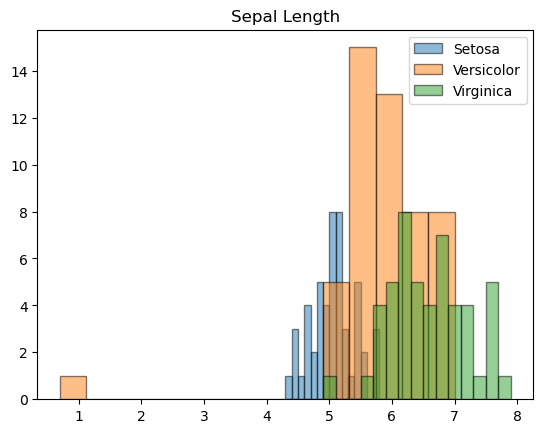

In [69]:
setosa_sepal_length=(iris[0][0][0],iris[0][1][0],iris[0][2][0],iris[0][3][0],iris[0][4][0],iris[0][5][0],iris[0][6][0],iris[0][7][0],iris[0][8][0],iris[0][9][0],iris[0][10][0],iris[0][11][0],iris[0][12][0],iris[0][13][0],iris[0][14][0],iris[0][15][0],iris[0][16][0],iris[0][17][0],iris[0][18][0],iris[0][19][0],iris[0][20][0],iris[0][21][0],iris[0][22][0],iris[0][23][0],iris[0][24][0],iris[0][25][0],iris[0][26][0],iris[0][27][0],iris[0][28][0],iris[0][29][0],iris[0][30][0],iris[0][31][0],iris[0][32][0],iris[0][33][0],iris[0][34][0],iris[0][35][0],iris[0][36][0],iris[0][37][0],iris[0][38][0],iris[0][39][0],iris[0][40][0],iris[0][41][0],iris[0][42][0],iris[0][43][0],iris[0][44][0],iris[0][45][0],iris[0][46][0],iris[0][47][0],iris[0][48][0],iris[0][49][0])

versicolor_sepal_length=(iris[1][0][0],iris[1][1][0],iris[1][2][0],iris[1][3][0],iris[1][4][0],iris[1][5][0],iris[1][6][0],iris[1][7][0],iris[1][8][0],iris[1][9][0],iris[1][10][0],iris[1][11][0],iris[1][12][0],iris[1][13][0],iris[1][14][0],iris[1][15][0],iris[1][16][0],iris[1][17][0],iris[1][18][0],iris[1][19][0],iris[1][20][0],iris[1][21][0],iris[1][22][0],iris[1][23][0],iris[1][24][0],iris[1][25][0],iris[1][26][0],iris[1][27][0],iris[1][28][0],iris[1][29][0],iris[1][30][0],iris[1][31][0],iris[1][32][0],iris[1][33][0],iris[1][34][0],iris[1][35][0],iris[1][36][0],iris[1][37][0],iris[1][38][0],iris[1][39][0],iris[1][40][0],iris[1][41][0],iris[1][42][0],iris[1][43][0],iris[1][44][0],iris[1][45][0],iris[1][46][0],iris[1][47][0],iris[1][48][0],iris[1][49][0])

virginica_sepal_length=(iris[2][0][0],iris[2][1][0],iris[2][2][0],iris[2][3][0],iris[2][4][0],iris[2][5][0],iris[2][6][0],iris[2][7][0],iris[2][8][0],iris[2][9][0],iris[2][10][0],iris[2][11][0],iris[2][12][0],iris[2][13][0],iris[2][14][0],iris[2][15][0],iris[2][16][0],iris[2][17][0],iris[2][18][0],iris[2][19][0],iris[2][20][0],iris[2][21][0],iris[2][22][0],iris[2][23][0],iris[2][24][0],iris[2][25][0],iris[2][26][0],iris[2][27][0],iris[2][28][0],iris[2][29][0],iris[2][30][0],iris[2][31][0],iris[2][32][0],iris[2][33][0],iris[2][34][0],iris[2][35][0],iris[2][36][0],iris[2][37][0],iris[2][38][0],iris[2][39][0],iris[2][40][0],iris[2][41][0],iris[2][42][0],iris[2][43][0],iris[2][44][0],iris[2][45][0],iris[2][46][0],iris[2][47][0],iris[2][48][0],iris[2][49][0])

plt.hist(setosa_sepal_length, bins=15, edgecolor="black", label="Setosa", alpha=0.5)
plt.hist(versicolor_sepal_length, bins=15, edgecolor="black", label="Versicolor", alpha=0.5)
plt.hist(virginica_sepal_length, bins=15, edgecolor="black", label="Virginica", alpha=0.5)
plt.legend()
plt.title("Sepal Length")
plt.set_xlabel=("Length of Sepal")
plt.set_ylabel=("Frequency")
plt.show()

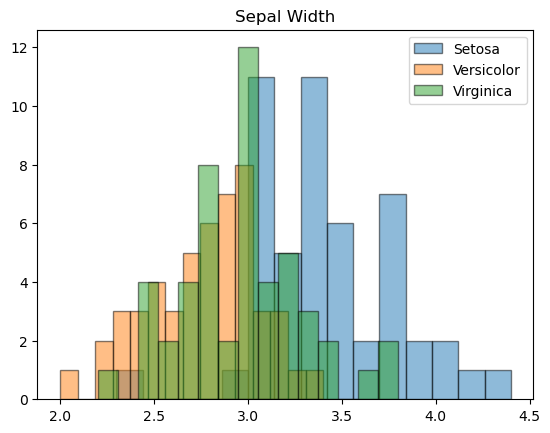

In [70]:
setosa_sepal_width=(iris[0][0][1],iris[0][1][1],iris[0][2][1],iris[0][3][1],iris[0][4][1],iris[0][5][1],iris[0][6][1],iris[0][7][1],iris[0][8][1],iris[0][9][1],iris[0][10][1],iris[0][11][1],iris[0][12][1],iris[0][13][1],iris[0][14][1],iris[0][15][1],iris[0][16][1],iris[0][17][1],iris[0][18][1],iris[0][19][1],iris[0][20][1],iris[0][21][1],iris[0][22][1],iris[0][23][1],iris[0][24][1],iris[0][25][1],iris[0][26][1],iris[0][27][1],iris[0][28][1],iris[0][29][1],iris[0][30][1],iris[0][31][1],iris[0][32][1],iris[0][33][1],iris[0][34][1],iris[0][35][1],iris[0][36][1],iris[0][37][1],iris[0][38][1],iris[0][39][1],iris[0][40][1],iris[0][41][1],iris[0][42][1],iris[0][43][1],iris[0][44][1],iris[0][45][1],iris[0][46][1],iris[0][47][1],iris[0][48][1],iris[0][49][1])

versicolor_sepal_width=(iris[1][0][1],iris[1][1][1],iris[1][2][1],iris[1][3][1],iris[1][4][1],iris[1][5][1],iris[1][6][1],iris[1][7][1],iris[1][8][1],iris[1][9][1],iris[1][10][1],iris[1][11][1],iris[1][12][1],iris[1][13][1],iris[1][14][1],iris[1][15][1],iris[1][16][1],iris[1][17][1],iris[1][18][1],iris[1][19][1],iris[1][20][1],iris[1][21][1],iris[1][22][1],iris[1][23][1],iris[1][24][1],iris[1][25][1],iris[1][26][1],iris[1][27][1],iris[1][28][1],iris[1][29][1],iris[1][30][1],iris[1][31][1],iris[1][32][1],iris[1][33][1],iris[1][34][1],iris[1][35][1],iris[1][36][1],iris[1][37][1],iris[1][38][1],iris[1][39][1],iris[1][40][1],iris[1][41][1],iris[1][42][1],iris[1][43][1],iris[1][44][1],iris[1][45][1],iris[1][46][1],iris[1][47][1],iris[1][48][1],iris[1][49][1])

virginica_sepal_width=(iris[2][0][1],iris[2][1][1],iris[2][2][1],iris[2][3][1],iris[2][4][1],iris[2][5][1],iris[2][6][1],iris[2][7][1],iris[2][8][1],iris[2][9][1],iris[2][10][1],iris[2][11][1],iris[2][12][1],iris[2][13][1],iris[2][14][1],iris[2][15][1],iris[2][16][1],iris[2][17][1],iris[2][18][1],iris[2][19][1],iris[2][20][1],iris[2][21][1],iris[2][22][1],iris[2][23][1],iris[2][24][1],iris[2][25][1],iris[2][26][1],iris[2][27][1],iris[2][28][1],iris[2][29][1],iris[2][30][1],iris[2][31][1],iris[2][32][1],iris[2][33][1],iris[2][34][1],iris[2][35][1],iris[2][36][1],iris[2][37][1],iris[2][38][1],iris[2][39][1],iris[2][40][1],iris[2][41][1],iris[2][42][1],iris[2][43][1],iris[2][44][1],iris[2][45][1],iris[2][46][1],iris[2][47][1],iris[2][48][1],iris[2][49][1])

plt.hist(setosa_sepal_width, bins=15, edgecolor="black", label="Setosa", alpha=0.5)
plt.hist(versicolor_sepal_width, bins=15, edgecolor="black", label="Versicolor", alpha=0.5)
plt.hist(virginica_sepal_width, bins=15, edgecolor="black", label="Virginica", alpha=0.5)
plt.legend()
plt.title("Sepal Width")
plt.set_xlabel=("Width of Sepal")
plt.set_ylabel=("Frequency")
plt.show()

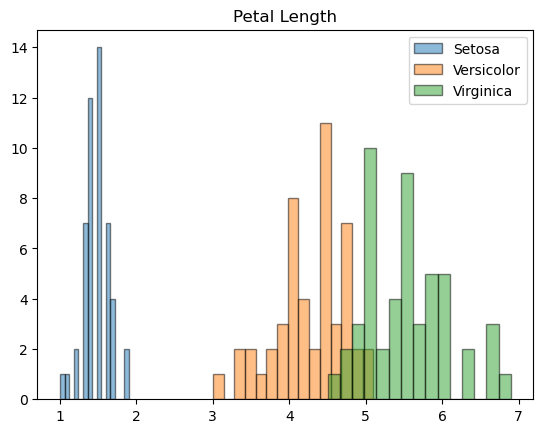

In [71]:
setosa_petal_length=(iris[0][0][2],iris[0][1][2],iris[0][2][2],iris[0][3][2],iris[0][4][2],iris[0][5][2],iris[0][6][2],iris[0][7][2],iris[0][8][2],iris[0][9][2],iris[0][10][2],iris[0][11][2],iris[0][12][2],iris[0][13][2],iris[0][14][2],iris[0][15][2],iris[0][16][2],iris[0][17][2],iris[0][18][2],iris[0][19][2],iris[0][20][2],iris[0][21][2],iris[0][22][2],iris[0][23][2],iris[0][24][2],iris[0][25][2],iris[0][26][2],iris[0][27][2],iris[0][28][2],iris[0][29][2],iris[0][30][2],iris[0][31][2],iris[0][32][2],iris[0][33][2],iris[0][34][2],iris[0][35][2],iris[0][36][2],iris[0][37][2],iris[0][38][2],iris[0][39][2],iris[0][40][2],iris[0][41][2],iris[0][42][2],iris[0][43][2],iris[0][44][2],iris[0][45][2],iris[0][46][2],iris[0][47][2],iris[0][48][2],iris[0][49][2])

versicolor_petal_length=(iris[1][0][2],iris[1][1][2],iris[1][2][2],iris[1][3][2],iris[1][4][2],iris[1][5][2],iris[1][6][2],iris[1][7][2],iris[1][8][2],iris[1][9][2],iris[1][10][2],iris[1][11][2],iris[1][12][2],iris[1][13][2],iris[1][14][2],iris[1][15][2],iris[1][16][2],iris[1][17][2],iris[1][18][2],iris[1][19][2],iris[1][20][2],iris[1][21][2],iris[1][22][2],iris[1][23][2],iris[1][24][2],iris[1][25][2],iris[1][26][2],iris[1][27][2],iris[1][28][2],iris[1][29][2],iris[1][30][2],iris[1][31][2],iris[1][32][2],iris[1][33][2],iris[1][34][2],iris[1][35][2],iris[1][36][2],iris[1][37][2],iris[1][38][2],iris[1][39][2],iris[1][40][2],iris[1][41][2],iris[1][42][2],iris[1][43][2],iris[1][44][2],iris[1][45][2],iris[1][46][2],iris[1][47][2],iris[1][48][2],iris[1][49][2])

virginica_petal_length=(iris[2][0][2],iris[2][1][2],iris[2][2][2],iris[2][3][2],iris[2][4][2],iris[2][5][2],iris[2][6][2],iris[2][7][2],iris[2][8][2],iris[2][9][2],iris[2][10][2],iris[2][11][2],iris[2][12][2],iris[2][13][2],iris[2][14][2],iris[2][15][2],iris[2][16][2],iris[2][17][2],iris[2][18][2],iris[2][19][2],iris[2][20][2],iris[2][21][2],iris[2][22][2],iris[2][23][2],iris[2][24][2],iris[2][25][2],iris[2][26][2],iris[2][27][2],iris[2][28][2],iris[2][29][2],iris[2][30][2],iris[2][31][2],iris[2][32][2],iris[2][33][2],iris[2][34][2],iris[2][35][2],iris[2][36][2],iris[2][37][2],iris[2][38][2],iris[2][39][2],iris[2][40][2],iris[2][41][2],iris[2][42][2],iris[2][43][2],iris[2][44][2],iris[2][45][2],iris[2][46][2],iris[2][47][2],iris[2][48][2],iris[2][49][2])

plt.hist(setosa_petal_length, bins=15, edgecolor="black", label="Setosa", alpha=0.5)
plt.hist(versicolor_petal_length, bins=15, edgecolor="black", label="Versicolor", alpha=0.5)
plt.hist(virginica_petal_length, bins=15, edgecolor="black", label="Virginica", alpha=0.5)
plt.legend()
plt.title("Petal Length")
plt.set_xlabel=("Length of Petal")
plt.set_ylabel=("Frequency")
plt.show()

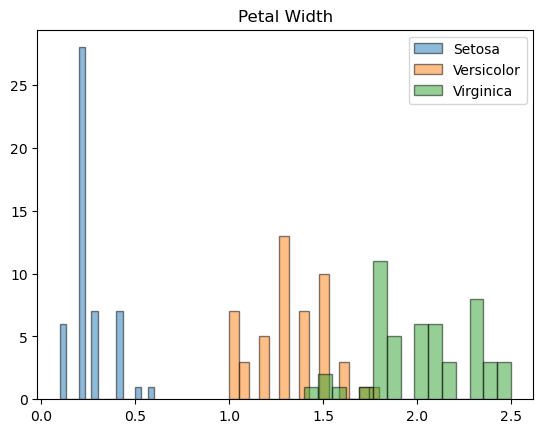

In [73]:
setosa_petal_width=(iris[0][0][3],iris[0][1][3],iris[0][2][3],iris[0][3][3],iris[0][4][3],iris[0][5][3],iris[0][6][3],iris[0][7][3],iris[0][8][3],iris[0][9][3],iris[0][10][3],iris[0][11][3],iris[0][12][3],iris[0][13][3],iris[0][14][3],iris[0][15][3],iris[0][16][3],iris[0][17][3],iris[0][18][3],iris[0][19][3],iris[0][20][3],iris[0][21][3],iris[0][22][3],iris[0][23][3],iris[0][24][3],iris[0][25][3],iris[0][26][3],iris[0][27][3],iris[0][28][3],iris[0][29][3],iris[0][30][3],iris[0][31][3],iris[0][32][3],iris[0][33][3],iris[0][34][3],iris[0][35][3],iris[0][36][3],iris[0][37][3],iris[0][38][3],iris[0][39][3],iris[0][40][3],iris[0][41][3],iris[0][42][3],iris[0][43][3],iris[0][44][3],iris[0][45][3],iris[0][46][3],iris[0][47][3],iris[0][48][3],iris[0][49][3])

versicolor_petal_width=(iris[1][0][3],iris[1][1][3],iris[1][2][3],iris[1][3][3],iris[1][4][3],iris[1][5][3],iris[1][6][3],iris[1][7][3],iris[1][8][3],iris[1][9][3],iris[1][10][3],iris[1][11][3],iris[1][12][3],iris[1][13][3],iris[1][14][3],iris[1][15][3],iris[1][16][3],iris[1][17][3],iris[1][18][3],iris[1][19][3],iris[1][20][3],iris[1][21][3],iris[1][22][3],iris[1][23][3],iris[1][24][3],iris[1][25][3],iris[1][26][3],iris[1][27][3],iris[1][28][3],iris[1][29][3],iris[1][30][3],iris[1][31][3],iris[1][32][3],iris[1][33][3],iris[1][34][3],iris[1][35][3],iris[1][36][3],iris[1][37][3],iris[1][38][3],iris[1][39][3],iris[1][40][3],iris[1][41][3],iris[1][42][3],iris[1][43][3],iris[1][44][3],iris[1][45][3],iris[1][46][3],iris[1][47][3],iris[1][48][3],iris[1][49][3])

virginica_petal_width=(iris[2][0][3],iris[2][1][3],iris[2][2][3],iris[2][3][3],iris[2][4][3],iris[2][5][3],iris[2][6][3],iris[2][7][3],iris[2][8][3],iris[2][9][3],iris[2][10][3],iris[2][11][3],iris[2][12][3],iris[2][13][3],iris[2][14][3],iris[2][15][3],iris[2][16][3],iris[2][17][3],iris[2][18][3],iris[2][19][3],iris[2][20][3],iris[2][21][3],iris[2][22][3],iris[2][23][3],iris[2][24][3],iris[2][25][3],iris[2][26][3],iris[2][27][3],iris[2][28][3],iris[2][29][3],iris[2][30][3],iris[2][31][3],iris[2][32][3],iris[2][33][3],iris[2][34][3],iris[2][35][3],iris[2][36][3],iris[2][37][3],iris[2][38][3],iris[2][39][3],iris[2][40][3],iris[2][41][3],iris[2][42][3],iris[2][43][3],iris[2][44][3],iris[2][45][3],iris[2][46][3],iris[2][47][3],iris[2][48][3],iris[2][49][3])

plt.hist(setosa_petal_width, bins=15, edgecolor="black", label="Setosa", alpha=0.5)
plt.hist(versicolor_petal_width, bins=15, edgecolor="black", label="Versicolor", alpha=0.5)
plt.hist(virginica_petal_width, bins=15, edgecolor="black", label="Virginica", alpha=0.5)
plt.legend()
plt.title("Petal Width")
plt.set_xlabel=("Width of Petal")
plt.set_ylabel=("Frequency")
plt.show()

## Task 5: Investigate Relationships

Choose any two features from the data set and create a scatter plot of them.
Color-code the three different classes of the scatter plot points.

## Task 6: Analyze Relationship

Choose any two features from the data set and create a scatter plot of them.


## Task 7: Analyze Class Distributions

Create box-plots of the petal lengths for each of the three classes

## Task 8: Compute Correlations

Calculate the correlation coefficients between the features.
Display the results as a heatmap using matplotlib.

## Task 9: Fit a Simple Linear Regression

For your two features in Task 5, calculate the coefficient of determination R 2 .
Re-create the plot from Task 6 and annotate it with the R 2 value.

## Task 10: Too Many Features

Use seaborn to create a pairplot of the data set.
Explain, in your own words, what the pairplot depicts.

## End